In [1]:
# You must install this system library to make pylibdmtx work
# sudo apt-get install libdmtx0b

In [2]:
from PIL import Image
import pylibdmtx.pylibdmtx
import albumentations
import numpy as np
import pandas as pd
import os

# First exploration

In [3]:
encoded = pylibdmtx.pylibdmtx.encode('Some new example. Second example.'.encode('utf8'))
img = Image.frombytes('RGB', (encoded.width, encoded.height), encoded.pixels)
img.save('pictures/dmtx.png')
decoded = pylibdmtx.pylibdmtx.decode(Image.open('pictures/dmtx.png'))
decoded[0].data.decode("utf8")

'Some new example. Second example.'

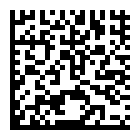

In [4]:
img

In [5]:
im_array = np.array(img)
for i in range(9):
    im_array[50][i] = [0, 0, 0]

In [6]:
pylibdmtx.pylibdmtx.decode(np.array(img))

[Decoded(data=b'Some new example. Second example.', rect=Rect(left=9, top=10, width=120, height=119))]

In [7]:
import torch
i = np.resize(np.array(img), (3, 1, 140, 140))
t  = torch.from_numpy(i)
t.shape

/home/kp/miniconda3/envs/dm-codes/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([3, 1, 140, 140])

In [8]:
i = np.array(img).reshape(3, 1, 140, 140)
t  = torch.from_numpy(i)
t.shape

torch.Size([3, 1, 140, 140])

In [9]:
import my_utils
n = my_utils.tensor_to_numpy_for_image(t)
n.shape

(3, 140, 140, 1)

In [10]:
n[0].shape

(140, 140, 1)

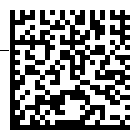

In [12]:
img2 = Image.fromarray(im_array)
img2

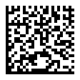

In [13]:
img_res = img.resize(size=(80,80))
img_res

In [14]:
pylibdmtx.pylibdmtx.decode(img_res)

[Decoded(data=b'Some new example. Second example.', rect=Rect(left=5, top=5, width=69, height=69))]

In [15]:
np.sum(np.asarray(img) == np.asarray(img2))

58773

In [16]:
pylibdmtx.pylibdmtx.decode(img2)

[Decoded(data=b'Some new example. Second example.', rect=Rect(left=8, top=10, width=121, height=119))]

In [17]:
pylibdmtx.pylibdmtx.decode(img)

[Decoded(data=b'Some new example. Second example.', rect=Rect(left=9, top=10, width=120, height=119))]

In [18]:
pylibdmtx.pylibdmtx.decode(img)[0].data.decode("utf8")

'Some new example. Second example.'

In [176]:
# parrots = Image.open("pictures/parrot.jpg")
# parrots

# Augmentations

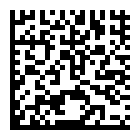

In [31]:
img

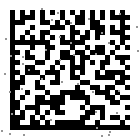

In [230]:
# CoarseDropout of the rectangular regions in the image.
Image.fromarray(albumentations.CoarseDropout(always_apply=True, fill_value=150, max_height=2, max_width=2, max_holes=40)(image=np.array(img))["image"])

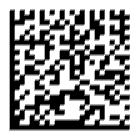

In [241]:
# Apply motion blur to the input image using a random-sized kernel.
Image.fromarray(albumentations.MotionBlur(always_apply=True, blur_limit=(3, 5))(image=np.array(img))["image"])

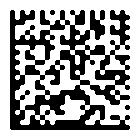

In [238]:
# Blur the input image using a median filter with a random aperture linear size.
Image.fromarray(albumentations.MedianBlur(always_apply=True, blur_limit=3)(image=np.array(img))["image"])

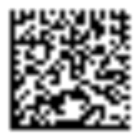

In [291]:
# Apply defocus transform.
Image.fromarray(albumentations.Defocus(always_apply=True, radius=(1,3))(image=np.array(img))["image"])

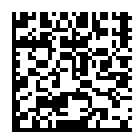

In [35]:
# Decreases image quality by downscaling and upscaling back.
Image.fromarray(albumentations.Downscale(always_apply=True)(image=np.array(img))["image"])

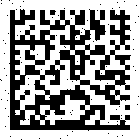

In [57]:
# Set pixels to 0 with some probability.
Image.fromarray(albumentations.PixelDropout(always_apply=True)(image=np.array(img))["image"])

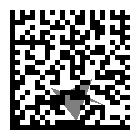

In [84]:
# Simulates shadows for the image
Image.fromarray(albumentations.RandomShadow(always_apply=True)(image=np.array(img))["image"])

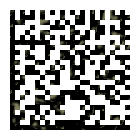

In [330]:
#
Image.fromarray(albumentations.Spatter(always_apply=True)(image=np.array(img))["image"])

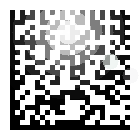

In [75]:
# Simulates Sun Flare for the image
Image.fromarray(albumentations.RandomSunFlare(always_apply=True, src_radius=100)(image=np.array(img))["image"])

In [363]:
import cv2

transform = albumentations.Compose([
    albumentations.CoarseDropout(fill_value=0, max_height=2, max_width=2, max_holes=40),
    albumentations.CoarseDropout(fill_value=255, max_height=2, max_width=2, max_holes=40),
    albumentations.OneOf([
        albumentations.MotionBlur(blur_limit=(3, 5)),
        albumentations.MedianBlur(blur_limit=3),
        albumentations.Defocus(radius=(1,3)),
    ]),
    albumentations.Spatter(),
    albumentations.Downscale(interpolation=cv2.INTER_LANCZOS4),
    albumentations.RandomShadow(),
    albumentations.RandomSunFlare(src_radius=100)
])

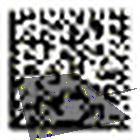

[]

In [398]:
transformed_img = Image.fromarray(transform(image=np.array(img))["image"])
display(transformed_img)

pylibdmtx.pylibdmtx.decode(np.array(transformed_img))

# Network

In [26]:
import conv_ae
import datamatrix_provider as dmp

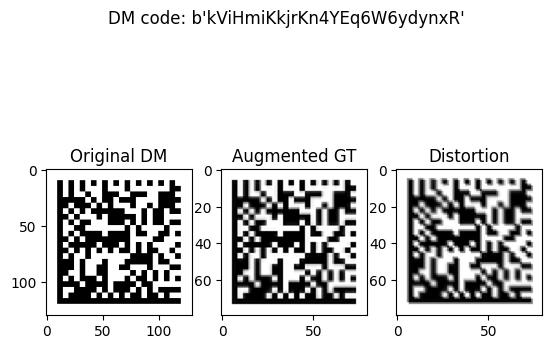

In [174]:
dm_provider_example = dmp.DataMatrixProvider(visualize=True)
dm_generate_example, dm_size_example, dm_mode_example, dm_mode_opts_example, dm_const_example = dm_provider_example.init_dm_provider(pylibdmtx_params={})
dm_clean_example, dm_augm_example, dm_text_example = dm_generate_example()

In [ ]:
type(dm_clean_example)

numpy.ndarray

In [ ]:
str(dm_text_example)

"b'8yILiw2YjCanlO5Qr00y'"

In [ ]:
type(dm_text_example.decode("utf8"))

str

In [412]:
foo = np.array([255, 255, 255])
foo2 = np.array([250, 240, 253])
np.isclose(foo, foo2, atol=5)

array([ True, False,  True])

In [417]:
log_n_predictions=3
bleb = 10

In [431]:
[bleb*i//log_n_predictions for i in range(log_n_predictions)]

[0, 3, 6]

In [440]:
foo_dict = {
    "col_1" : 3,
    "col_2" : 6,
    "col_3": -1
}
foo_dict_list = [foo_dict, foo_dict, foo_dict]

In [441]:
pd.DataFrame(foo_dict_list)

,col_1,col_2,col_3
0,3,6,-1
1,3,6,-1
2,3,6,-1


In [438]:
pd.DataFrame(foo_dict_list).mean().to_dict()

{'col_1': 3.0, 'col_2': 6.0, 'col_3': -1.0}